In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bace.bace_utils import sample_thetas
from bace.design_optimization import design_tuner, get_next_design
from bace.pmc_inference import pmc
from bace.user_config import theta_params, likelihood_pdf, answers

N = 50000
true_value = sample_thetas(theta_params, N=1).to_dict(orient='r')[0]

def get_response(true_value, design, answers):
    w = []
    for a in answers:
        w.append(likelihood_pdf(a, true_value, **design))
    w = np.cumsum(w)
    r = np.random.uniform()
    index = np.searchsorted(w, r)
    return answers[index]

def plot_posterior(posterior, design, true_value, Q):

    num_bins = 50

    # Create the density plot
    fig, ax = plt.subplots()
    n, bins, patches = ax.hist(posterior['x'], bins=num_bins, density=True, histtype='stepfilled', alpha=0.5)

    # Add a title and axis labels
    ax.set_title(f'Density Plot after Question: {Q}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

    # Add a vertical line at the mean of the data
    mean_x = posterior.mean()['x']
    ax.axvline(mean_x, color='red', linestyle='dashed', linewidth=2)
    ax.axvline(design['x1'], color='black', linestyle='dotted')
    ax.axvline(design['x2'], color='black', linestyle='dotted')
    ax.axvline(true_value['x'], color='green')

    plt.show()

design_history = []
answer_history = []

  0%|          | 0/20 [00:00<?, ?it/s]

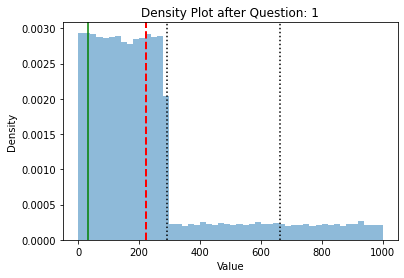

In [2]:
# Select design.
thetas = sample_thetas(theta_params, N)
design = get_next_design(thetas, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))


  0%|          | 0/20 [00:00<?, ?it/s]

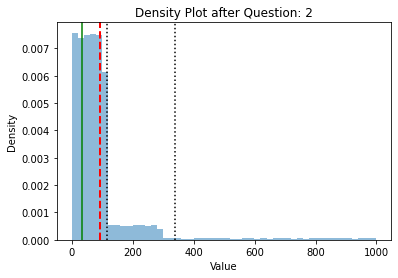

In [3]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

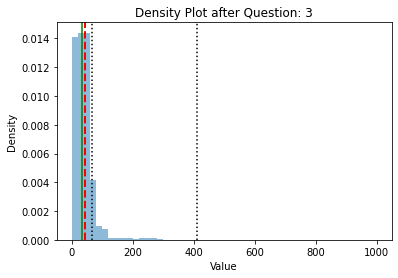

In [4]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

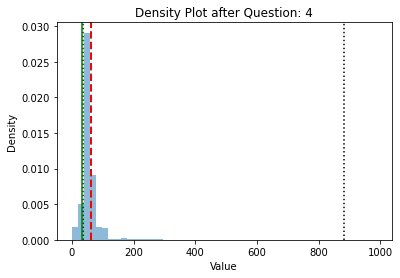

In [5]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

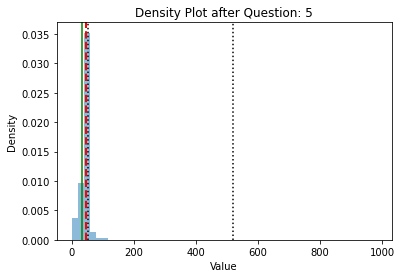

In [6]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

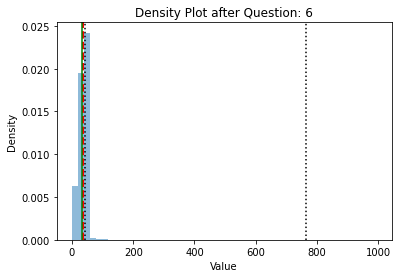

In [7]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

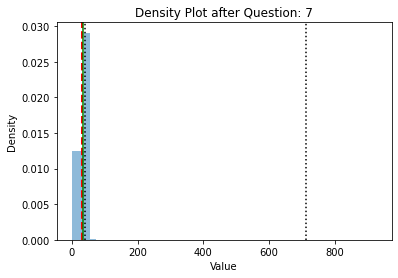

In [8]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

  0%|          | 0/20 [00:00<?, ?it/s]

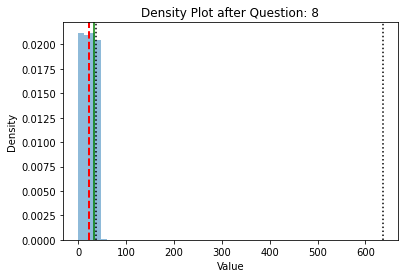

In [9]:
# Select design.
design = get_next_design(posterior, design_tuner)

# Get answer according to likelihood function
answer = get_response(true_value, design, answers)

# Store data
design_history.append(design)
answer_history.append(answer)

# Calculate posterior
posterior = pmc(theta_params, answer_history, design_history, likelihood_pdf, N, J=20)

# Plot output
plot_posterior(posterior, design, true_value, len(design_history))

In [10]:
print(f'True value: {true_value}')
print(f'Estimated Value\nMean:\n{posterior.mean()}\nMedian:\n{posterior.median()}')

True value: {'x': 32.94685438489342, 'p': 0.7662406277457148}
Estimated Value
Mean:
x    22.687179
p     0.872789
dtype: float64
Median:
x    23.763074
p     0.873416
dtype: float64
